In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.linear_model import ridge_regression
from sklearn.metrics import accuracy_score,classification_report

Data=pd.read_csv('tiktok_dataset.csv', encoding='Latin_1')

In [74]:
Df=Data.dropna()
Df=Data.drop_duplicates()

In [75]:
Df=Data.drop(columns=['#','video_transcription_text'])

In [76]:
Df.head()

,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [77]:
Df.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [78]:
DF_encoded = pd.get_dummies(Df, columns=['claim_status', 'verified_status', 'author_ban_status'])
DF_encoded['claim_status_claim'] = DF_encoded['claim_status_claim'].astype(int)
DF_encoded['claim_status_opinion'] = DF_encoded['claim_status_opinion'].astype(int)
DF_encoded['verified_status_not verified'] = DF_encoded['verified_status_not verified'].astype(int)
DF_encoded['verified_status_verified'] = DF_encoded['verified_status_verified'].astype(int)
DF_encoded['author_ban_status_active'] = DF_encoded['author_ban_status_active'].astype(int)
DF_encoded['author_ban_status_banned'] = DF_encoded['author_ban_status_banned'].astype(int)
DF_encoded['author_ban_status_under review'] = DF_encoded['author_ban_status_under review'].astype(int)

Features=['video_id', 'video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count',
          'claim_status_claim', 'claim_status_opinion', 'verified_status_not verified', 'verified_status_verified', 'author_ban_status_active',
          'author_ban_status_banned', 'author_ban_status_under review']
Target=['claim_status_claim','claim_status_opinion']

X = DF_encoded[Features]
y =DF_encoded[Target]

In [79]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


scaler = Binarizer()
X_train_binarized = scaler.fit_transform(X_train)
X_test_binarized = scaler.transform(X_test)


model = OneVsRestClassifier(MultinomialNB())
model.fit(X_train_binarized, y_train)


y_pred = model.predict(X_test_binarized)


print("Model prediction:\n", classification_report(y_test, y_pred, target_names=Target))


Model prediction:
                       precision    recall  f1-score   support

  claim_status_claim       1.00      1.00      1.00      2900
claim_status_opinion       0.97      1.00      0.99      2827

           micro avg       0.98      1.00      0.99      5727
           macro avg       0.98      1.00      0.99      5727
        weighted avg       0.99      1.00      0.99      5727
         samples avg       0.98      0.98      0.98      5727



c:\Users\TOSHIBA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\TOSHIBA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x800 with 0 Axes>

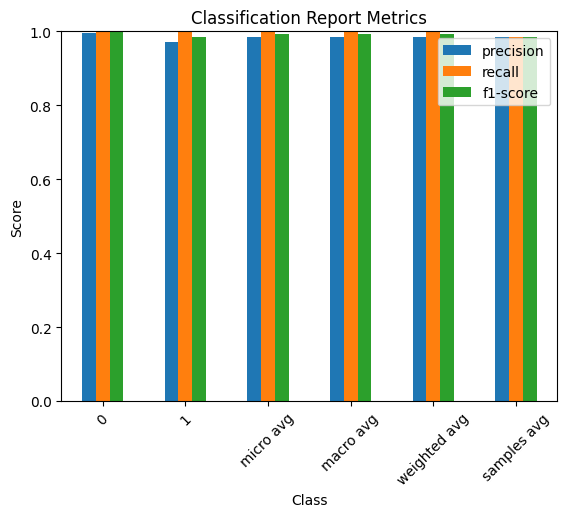

In [80]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()


plt.figure(figsize=(12, 8))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', rot=45)
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.legend(loc='best')
plt.show()

In [81]:
DF_encoded.head()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_claim,claim_status_opinion,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,7017666017,59,343296.0,19425.0,241.0,1.0,0.0,1,0,1,0,0,0,1
1,4014381136,32,140877.0,77355.0,19034.0,1161.0,684.0,1,0,1,0,1,0,0
2,9859838091,31,902185.0,97690.0,2858.0,833.0,329.0,1,0,1,0,1,0,0
3,1866847991,25,437506.0,239954.0,34812.0,1234.0,584.0,1,0,1,0,1,0,0
4,7105231098,19,56167.0,34987.0,4110.0,547.0,152.0,1,0,1,0,1,0,0
